# Praca domowa 1.
## Analiza zbioru Heart Disease in Patients from Cleveland

### Pakiety

In [5]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Wczytanie danych

In [6]:
# ustawienie ziarna gwarantuje reprodukowalność wyników
np.random.seed(123) 

# wczytanie danych
data = pd.read_csv('heart_disease_dataset.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


### Konwencja nazewnicza wraz z indeksowaniem
0. **age**
1. **sex** - 1=male; 0=female
2. **cp** - chest pain type: 1=typical angina; 2=atypical angine; 3=non-anginal pain; 4=asymptomatic 
3. **trestbps** - resting blood pressure (mm Hg)
4. **chol** - serum cholestrol (mg/dl)
5. **fbs** - fasting blood sugar: 1 if > 120 mg/dl; 0 otherwise
6. **restecg** - resting electrocardiographic results: 0=normal; 1=having ST-T wave abnormality; 2=showing probable or definite left ventricular hypertrophy
7. **thalach** - maximum heart rate achieved
8. **exang** - exercise induced angina: 1=yes; 0=no
9. **oldpeak** - ST depression induced by exercise relative to rest
10. **slope** - the slope of the peak exercise ST segment: 1=upsloping; 2=flat; 3=downsloping
11. **ca** - number of major vessels (0-3) colored by flourosopy
12. **thal** - 3=normal; 6=fixed defect; 7=reversable defect
13. **num** - predicted attribute; 0=HEART DISEASE; 1=NO HEART DISEASE

## Wstępna analiza zbioru

In [7]:
data.info()
# dane nie wymagają czyszczenia - brak braków, w zbiorze występują wyłącznie dane numeryczne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
num         303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# W związku z tym, że w zbiorze występują tylko dane numeryczne może być zastosowana metoda describe,
# która zwraca zestawienie podstawowych danych statystycznych, tj.: mediany, kwartyle, średnie, itp.

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [9]:
# Na podstawie powyższych statystyk możemy określić jakie dane występują w poszczególnych kolumnach - ciągłe czy
# dyskretne a także zakres ich wartości. To okaże się pomocne przy doborze geometrii w dalszej analizie. 

## Analiza zależności pomiędzy zmiennymi

### Selekcja zmiennych

Text(0.5, 1, 'Wykres 1. Korelacja zmiennych')

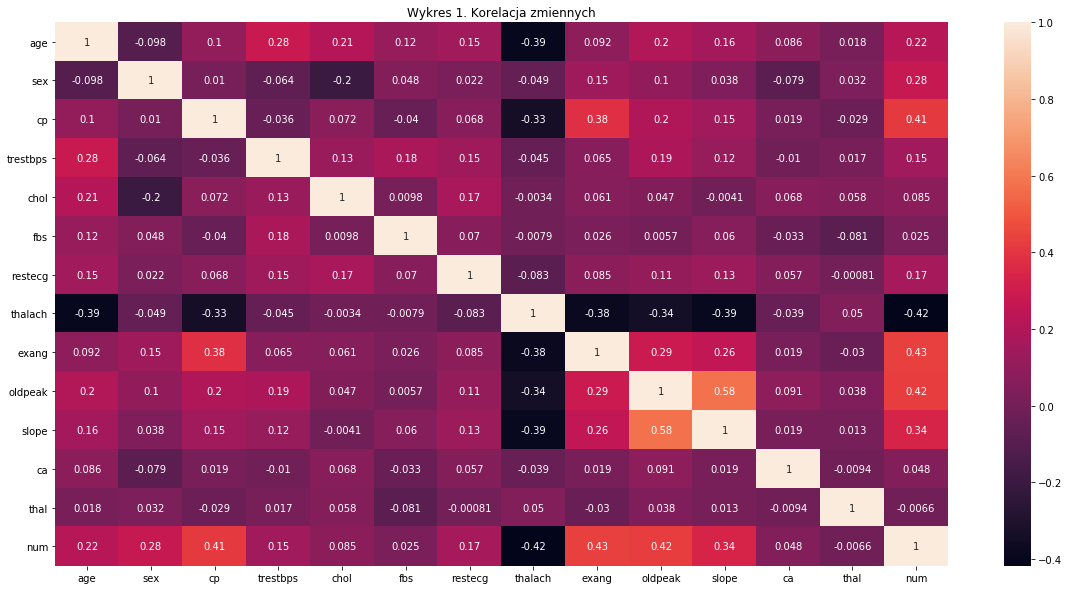

In [20]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
corr=data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)
ax.set_title("Wykres 1. Korelacja zmiennych")

### Korelacja wybranych zmiennych

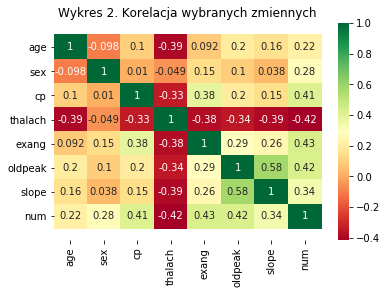

In [21]:
corr=data.iloc[:, np.r_[0:3, 7:11, 13]].corr()
ax=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True, cmap = 'RdYlGn')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Wykres 2. Korelacja wybranych zmiennych')
plt.show()

Najbardziej znaczącą zależnością, jak wynika z powyższego wykresu, jest korelacja zmiennych **slope** i **oldpeak**  


Z punktu widzenia potencjalnej diagnozy choroby kardiologicznej (zmienna **num**), największe znaczenie mają zmienne: **exang**, **oldpeak**, **tchalach**, **cp** oraz **slope**. Nie mniej jednak, warto zwrócić uwagę na cechę **thalach** w szerszym kontekście, ponieważ wyraźnie wpływa ona, nie tylko na zmienną **num**, ale na wszystkie pozostałe parametry.  

  
Dalsza analiza zorientowana będzie na wyżej wymienione zmienne i zależności. Pozostałe korelacje uznajemy za relatywnie pomijalne.

###  Zależności pomiędzy zmiennymi **slope** i **oldpeak**

In [22]:
# dodatni współczynnik kolelacji (0.58)

In [23]:
# zmienne slope i oldpeak oznaczają odpowiednio: nachylenie odcinka ST oraz obniżenie odcinka ST pod wpływem
# wysiłku fizycznego, gdzie odcinek ST w terminologii medycznej oznacza fragment zapisu elektrokardiograficznego.  

Na podstawie wyżej wykonanych statystyk oraz dołączonego opisu zbioru wiadomo, że parametr oldpeak jest typu ciągłego a slope dyskretnego (przyjmuje wartości: 1,2,3).

mediana = 0.8
średnia = 1.0396039603960396


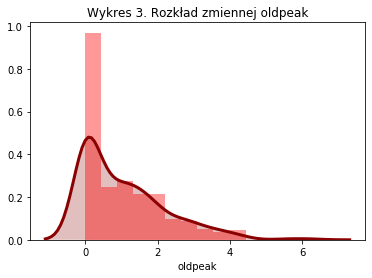

In [25]:
sns.set_color_codes()
oldpeak_dens = sns.distplot(data.oldpeak, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color': 'darkred'}, color='red')
oldpeak_dens.set_title('Wykres 3. Rozkład zmiennej oldpeak') 

print('mediana = %s' % np.median(data.oldpeak))
print('średnia = %s' % np.mean(data.oldpeak))

Wykres wskazuje rozkład jednomodalny. Biorąc pod uwagę kształt histogramu, możemy wywnioskować rozkład wykładniczy.  


Wyraźnie przesunięcie krzywej gęstości w lewo sugeruje dodatnią wartość współczynnika asymetrii. Dodatnia wartość tego współczynnika wskazuje na asymetrię prawostronną, która mówi, że średnia arytmetyczna cechy jest większa od mediany oraz, że **większa część populacji klasuje się powyżej przeciętnego poziomu badanej cechy**.

Q1 = 0.0 Q3 = 1.6 minimum = 0.0 maksimum = 6.2


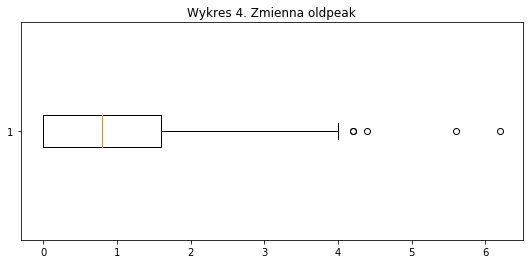

In [26]:
fig1, ax1 = plt.subplots(figsize = (9, 4))
ax1.set_title('Wykres 4. Zmienna oldpeak')
ax1.boxplot(data.oldpeak, vert=False)

print('Q1 = %s' % np.percentile(data.oldpeak, 25),'Q3 = %s' %np.percentile(data.oldpeak, 75),
      'minimum = %s' % np.min(data.oldpeak), 'maksimum = %s' % np.max(data.oldpeak))

Powyższy wykres świadczy o relatywnie dużym rozrzucie danych przy umiarkowanym rozstępie międzykwartylowym. Wskazuje również obecność obserwacji odstających, dlatego też nie należy poddawać rozważaniom średniej wartości zmiennej oldpeak, gdyż średnia jest miarą relacji centralnej, która charakeryzuje się dużą wrażliwością na outlier'y.

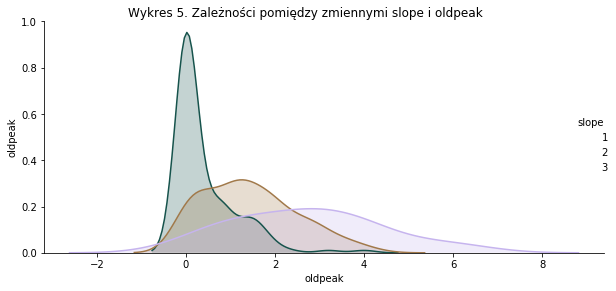

In [27]:
ax = sns.pairplot(data.iloc[:, [9, 10]], size = 4, hue = 'slope', aspect=2, palette=('cubehelix'), 
                  markers='o')
ax.fig.suptitle('Wykres 5. Zależności pomiędzy zmiennymi slope i oldpeak', y = 1)
plt.tight_layout()

Na podstawie powyższych wykresów można stwierdzić, że **dla jednostek statystycznych o najsilniej odstających wartościach zmiennej oldpeak, parametr slope przyjmuje wartość 3** (downsloping). Sugeruje to, że im wyższa wartość parametru oldpeak, tym wyższa wartość zmiennej slope. W celu weryfikacji poprawności sugerowanej tendencji można posłużyć się krzywą regresji oraz wykresami skrzypcowymi.

Text(0.5, 0.98, 'Wykres 6. Zależność pomiędzy zmiennymi slope i oldpeak')

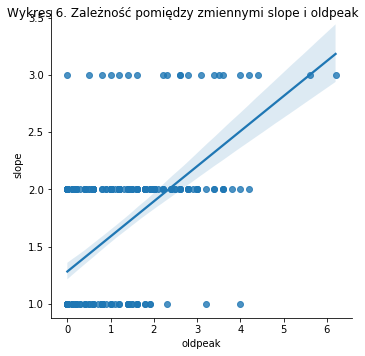

In [28]:
sns.lmplot(x='oldpeak', y='slope', data=data).fig.suptitle('Wykres 6. Zależność pomiędzy zmiennymi slope i oldpeak')

Wiedząc, że prosta regresji reprezentuje oszacowaną wartość oczekiwaną zmiennej slope przy konkretnych wartościach zmiennej oldpeak, można wywnioskować, **rozważane zmienne są proporcjonalne**. Zatem w terminologii medycznej: **im większe obliżenie odcinka ST pod wpływem wysiłku, tym wyższa kategoria nachylenia tego odcinka** (przy konwencji: 1=upsloping; 2=flat; 3=downsloping)

W przypadku wykresów skrzypcowych jako cechę nominalną przyjmujemy parametr o wartościach dyskretnych, w tym 
przypadku zmienną slope.

Text(0.5, 1.0, 'Wykres 7. Zależność pomiędzy zmiennymi slope i oldpeak')

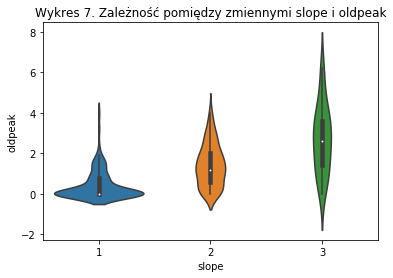

In [29]:
sns.violinplot(data.slope, data.oldpeak).set_title('Wykres 7. Zależność pomiędzy zmiennymi slope i oldpeak')

Łatwo zauważyć, że **jednostki o wyższych wartościach parametru slope charakteryzują się średnio wyższą wartością cechy oldpeak**.  
Ponadto na podstawie powyższego wykresu można uzasadnić fakt pokrywania się minimum i pierwszego kwartyla zmiennej oldpeak dla całej populacji (patrz wykres 3.). Wynika to bowiem z faktu, że **dla slope = 1,  mamy do czynienia z wyrażnym rozkładem jednomodalnym**, t.że wartość dominanty wynosi 0. **Dla pozostałych wartości parametru slope rozkłady zmiennej oldpeak są bardziej zrównoważone**.

**Dodatkowy wniosek:** Dla dodatniej wartości współczynnika korelacji, prosta regresji ma dodatni współczynnik kierunkowy

### Zależność pomiędzy zmiennymi oldpeak i num 

In [30]:
# dodatni współczynnik korelacji (0.42)

In [31]:
# wpływ wartości zmiennej oldpeak na diagnozę choroby serca

średnia_chorych = 0.5865853658536585
średnia_zdrowych = 1.5741007194244605


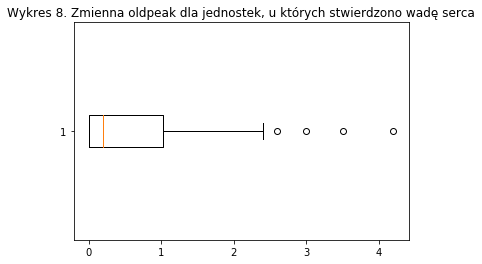

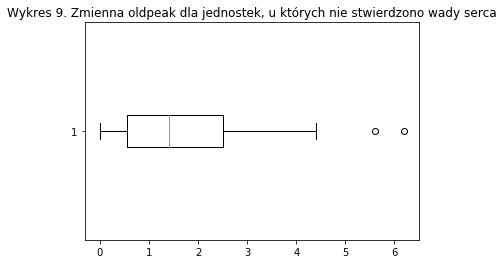

In [32]:
d = data[data['num'] == 0]
fig1, ax1 = plt.subplots()
ax1.set_title('Wykres 8. Zmienna oldpeak dla jednostek, u których stwierdzono wadę serca')
ax1.boxplot(d.oldpeak, vert=False)
print('średnia_chorych = %s' % np.mean(d.oldpeak))

d = data[data['num'] == 1]
fig1, ax1 = plt.subplots()
ax1.set_title('Wykres 9. Zmienna oldpeak dla jednostek, u których nie stwierdzono wady serca')
ax1.boxplot(d.oldpeak, vert=False)
print('średnia_zdrowych = %s' % np.mean(d.oldpeak))

Zarówno wśród osób chorych, jak i zdrowych znajdują się jednostki, dla których zmienna oldpeak przyjmuje wartości bliskie 0. Biorąc jednak pod uwagę charakterystyki położenia możemy zaobserwować, że **zarówno mediana, średnia jak i wartości kwartyli są większe dla jednostek, u których nie stwierdzono wady serca**. 

Text(0.5, 1.0, 'Wykres 10. Zależność pomiędzy zmiennymi num i oldpeak')

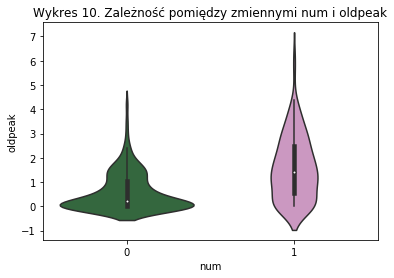

In [33]:
sns.violinplot(data.num, data.oldpeak, palette=('cubehelix')).set_title('Wykres 10. Zależność pomiędzy zmiennymi num i oldpeak')

Z powyższego wykresu wprost wynika, że **u pacjentów o niskich wartościach zmiennej oldpeak, częściej diagnozuje się choroby kardiologiczne**.  
Z wcześniejszych rozważań wyniknęło, że zmienne slope i oldpeak są proporcjonalne. Zatem równoważnym wnioskiem jest stwierdzenie: **u pacjentów o niskich wartościach zmiennej oldpeak i tym samym niskich wartościach parametru slope częściej diagnozuje się choroby kardiologiczne**

### Zależność pomiędzy zmiennymi oldpeak/slope i thalach

In [18]:
# ujemny współczynnik korelacji (-0.39/-0.34)

In [19]:
# thalach - maksymalne osiągnięte tętno (typ ciągły)

mediana = 153.0
średnia = 149.6072607260726


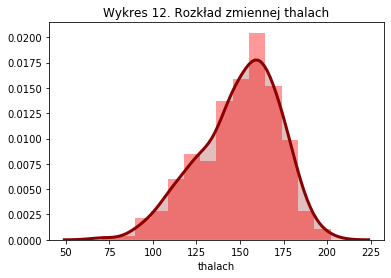

In [34]:
thalach_dens = sns.distplot(data.thalach, hist = True, color = 'red', kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color': 'darkred'})
thalach_dens.set_title('Wykres 12. Rozkład zmiennej thalach') 

print('mediana = %s' % np.median(data.thalach))
print('średnia = %s' % np.mean(data.thalach))

Wykres wskazuje rozkład jednomodalny.  
Kształt krzywej gęstości sugeruje symetrię lewostronną, zatem średnia arytmetyczna cechy jest mniejsza od mediany oraz, że **większa część populacji klasuje się poniżej przeciętnego poziomu badanej cechy**.

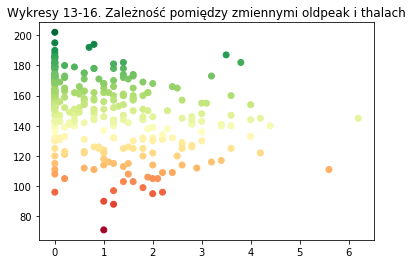

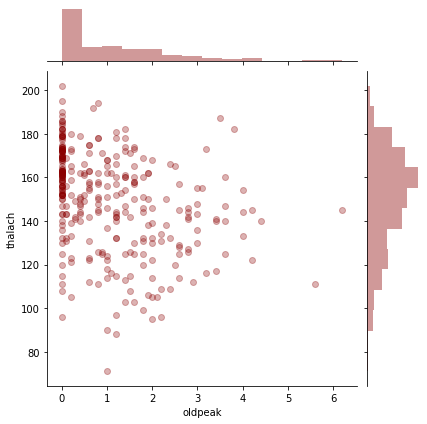

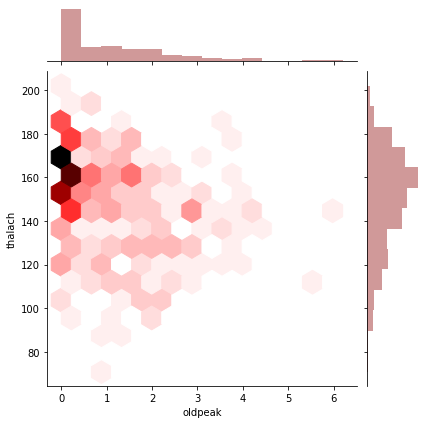

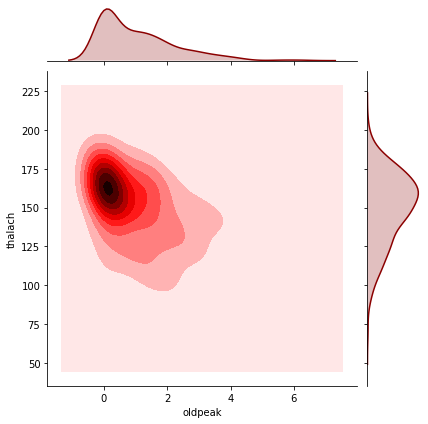

In [35]:
fig, ax = plt.subplots()
ax.set_title('Wykresy 13-16. Zależność pomiędzy zmiennymi oldpeak i thalach')

sctr = ax.scatter(data.oldpeak, data.thalach, c = data.thalach, cmap = 'RdYlGn')

sns.jointplot(x=data["oldpeak"], y=data["thalach"], kind='scatter', color = 'darkred', alpha = 0.3)
sns.jointplot(x=data["oldpeak"], y=data["thalach"], kind='hex', color = 'darkred')
sns.jointplot(x=data["oldpeak"], y=data["thalach"], kind='kde', color = 'darkred')

**Jednostki o skrajnie niskich wartościach zmiennej thalach charakteryzują się relatywnie niskimi wartościami parametru oldpeak. Odwrotny wniosek nie zachodzi - tzn. dla niskich wartości zmiennych oldpeak, zmienna thalach przyjmuje wszystkie 
możliwe wartości**.

Text(0.5, 0.98, 'Wykres 17. Zależność pomiędzy zmiennymi oldpeak i thalach')

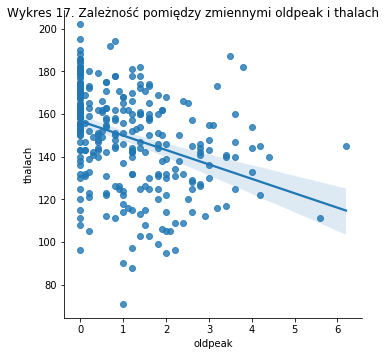

In [36]:
sns.lmplot(x = 'oldpeak', y = 'thalach', data = data).fig.suptitle('Wykres 17. Zależność pomiędzy zmiennymi oldpeak i thalach')

  Z kształtu krzywej regresji wynika, że **oczekiwana wartość cechy thalach maleje wraz ze wzrostem wartości parametru oldpeak**.

**Uwaga!** Ze względu na to, że jak wynika z wcześniej przeprowadzonej analizy, zmienne slope i oldpeak są proporcjonalne,równoważnie można byłoby powiedzieć, że oczekiwana wartość cechy thalach maleje wraz ze wzrostem wartości parametru slope. (weryfikacja tezy na wykresie poniżej)

Text(0.5, 1.0, 'Wykres 18. Zależność pomiędzy zmiennymi slope i thalach')

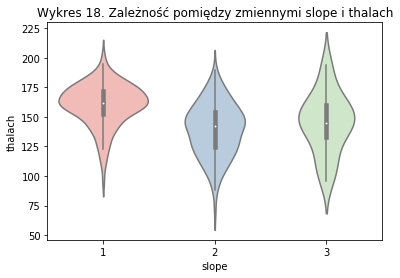

In [37]:
sns.violinplot(data.slope, data.thalach, palette = 'Pastel1').set_title('Wykres 18. Zależność pomiędzy zmiennymi slope i thalach')

**Dodatkowy wniosek:** Dla ujemnej wartości współczynnika korelacji, prosta regresji ma ujemny współczynnik kierunkowy

### Zależność pomiędzy zmiennymi num i thalach

In [24]:
# ujemny współczynnik korelacji (-0.42)

In [25]:
# wpływ wartości maksymalnego osiągniętego tętna na diagnozę choroby serca
# O diagnozie choroby serca mówi zmienna num, zgodnie z konwencją:  
# 0 = HEART DISEASE;   
# 1 = NO HEART DISEASE

Text(0.5, 1.0, 'Wykres 19. Zależność pomiędzy zmiennymi num i thalach')

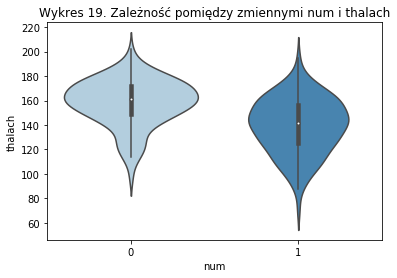

In [38]:
sns.violinplot(data.num, data.thalach, palette = 'Blues').set_title('Wykres 19. Zależność pomiędzy zmiennymi num i thalach')

Rozkłady zmiennej tchalach dla obydwu wartości parametru num są jednomodalne.  
**Próba, u której stwierdzono wadę serca (wartość cechy nominalnej wyn. 0) charakteryzuje się średnio wyższą wartością maksymalnego osiąganego tętna oraz wyższą wartością dominującą tego parametru** 

### Zależności pomiędzy zmiennymi **sex** i **thalach**. 

In [27]:
# 1=male; 0=female

Text(0.5, 1.0, 'Wykres 20. Zależność maksymalnego osiąganego tętna od płci')

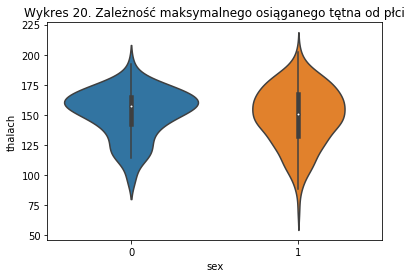

In [39]:
sns.violinplot(data.sex, data.thalach).set_title('Wykres 20. Zależność maksymalnego osiąganego tętna od płci')

**Kobiety mają średnio wyższe maksymalne osiągnięte tętno niż mężczyźni.** Rozkłady zmiennej thalach dla obydwu płci
są jednomodalne. **Dominanta w przypadku kobiet jest nieznacznie wyższa niż w przypadku mężczyzn.**  
Na podstawie wykresu 1. widać, że płeć i potencjalna diagnoza nie są silnie skorelowane, dlatego też nie ma sensu analizowania powyższej wizualizacji w tym kontekście. 

### Zależności pomiędzy zmiennymi **cp** i **exang**. 

In [29]:
# dodatni współczynnik korelacji (0.38)

In [30]:
# Zmienna exang wskazuje czy wysiłek fizyczny wywołuje u pacjenta ból w klatce piersiowej, natomiast parametr 
# cp określa typ tego bólu. Obydwie zmienne są typu dyskretnego.

Text(0.5, 0.98, 'Wykres 21. Zmienne cp i exang')

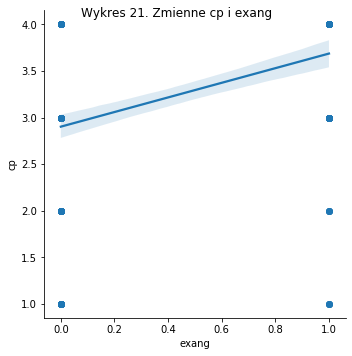

In [40]:
sns.lmplot(x='exang', y='cp', data=data).fig.suptitle('Wykres 21. Zmienne cp i exang')

Wbrew intuicji, zarówno w przypadku gdy exang == 0 jak i exang == 1, parametr cp przyjmuje wszystkie dopuszczalne wartości.  
Rozważmy zatem oddzielnie obydwa przypadki.

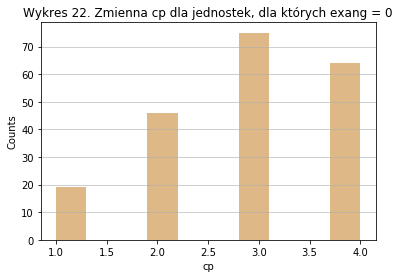

In [41]:
d = data[data['exang'] == 0].filter(['cp'])
d.plot.hist(color='burlywood', legend = False)
plt.title('Wykres 22. Zmienna cp dla jednostek, dla których exang = 0')
plt.xlabel('cp')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

W przypadku, gdy exang = 0, nie obserwuje się jednoznacznej tendencji dotyczącej zmiennej cp. Nie mniej jednak z powyższego wykresu, można odczytać, że w wyżej rozważanym podzbiorze próby w większości przypadków cp wynosi co najmniej 3. Równoważnie, stosując terminologię medyczną, można powiedzieć, że **u większości pacjentów, u których w próbie wysiłkowej nie stwierdzono bólu, ból klatki piersiowej nie występuje lub jest asymptomatyczny**.

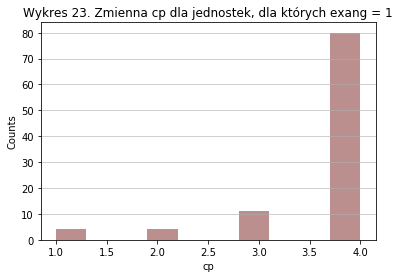

In [42]:
d = data[data['exang'] == 1].filter(['cp'])
d.plot.hist(color='rosybrown', legend = False)
plt.title('Wykres 23. Zmienna cp dla jednostek, dla których exang = 1')
plt.xlabel('cp')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

Okazuje się zatem, że **w przypadku gdy exang = 1, wśród wartości przyjmowanych przez parament cp zdecydowanie dominuje wartość 4**. W nomenklaturze medycznej oznacza to, że **jednostki, u których pod wpływem wysiłku fizycznego stwierdzono występowanie bólu, ból klatki piersiowej jest w większości przypadków asymptomatyczny**. 

### Zależności pomiędzy zmiennymi cp/exang i thalach.

In [34]:
# ujemne współczynniki korelacji (-0.33/-0.38)

Text(0.5, 1.0, 'Wykres 24. Zależność pomiędzy zmiennymi cp i thalach')

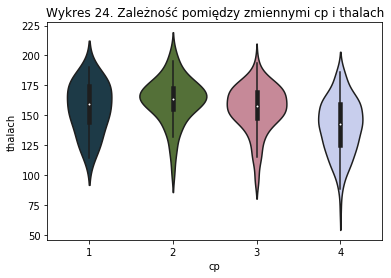

In [43]:
sns.violinplot(data.cp, data.thalach, palette=('cubehelix')).set_title('Wykres 24. Zależność pomiędzy zmiennymi cp i thalach')

**Im wyższa wartość parametru cp, tym niższe wartości charakterystyk centralnych zmiennej thalach**. 

Text(0.5, 1.0, 'Wykres 25. Zależność pomiędzy zmiennymi exang i thalach')

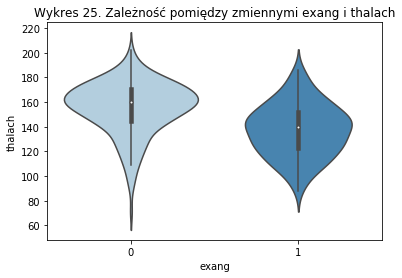

In [44]:
sns.violinplot(data.exang, data.thalach, palette=('Blues')).set_title('Wykres 25. Zależność pomiędzy zmiennymi exang i thalach')

**Im wyższa wartość parametru exang, tym niższe wartości charakretystyk centralnych zmiennej thalach.** (Wniosek można również uzasadnić w oparciu o nachylenie prostej regresji na wykresie 17.)

### Zależności pomiędzy zmiennymi **num** i **exang**. 

In [37]:
# dodatni współczynnik korelacji (0.43)

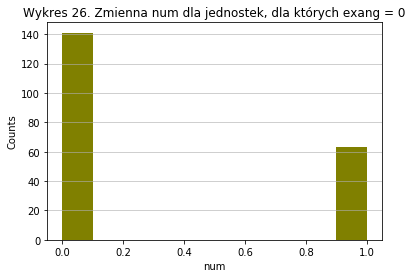

In [45]:
d = data[data['exang'] == 0].filter(['num'])
d.plot.hist(color='olive', legend = False)
plt.title('Wykres 26. Zmienna num dla jednostek, dla których exang = 0')
plt.xlabel('num')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

**U większości pacjentów, u których nie stwierdzono bólu wywołanego wysiłkiem fizycznym, zdiagnozowano chorobę serca.**

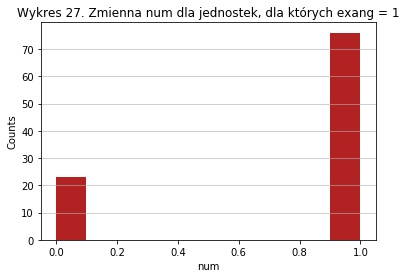

In [46]:
d = data[data['exang'] == 1].filter(['num'])
d.plot.hist(color='firebrick', legend = False)
plt.title('Wykres 27. Zmienna num dla jednostek, dla których exang = 1')
plt.xlabel('num')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

**U większości pacjentów, u których stwierdzono ból wywołany wysiłkiem fizycznym, nie zdiagnozowano choroby serca.**

**Uwaga:** Wszystkie wyciągnięte powyżej wnioski i zaobserwowane tendencje są adekwatne dla analizowanej populacji bądź jej podzbiorów. Nie mogą być one, uogólniane ze względu na zbyt małą liczbę rekordów w przetwarzanym zbiorze danych. 

## Automatyczna eksploracja danych

In [40]:
# Narzędzie pandas profiling
from pandas_profiling import ProfileReport

In [41]:
profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Głownym niedostatkiem narzędzia jest czas wykonywania dla dużych zbiorów danych. Wraz ze wzrostem wielkości danych czas generowania raportu również znacznie wzrasta. Wynika to z faktu, że analityk nie ma możliwości ukierunkowania analizy, eksploracji. Badane są własności i korelacje wszystkich zmiennych (zarówno numerycznych, jak i kategorycznych). Z jednej strony jest to korzystne, gdyż zapobiega przeoczeniu istotnych zależności, z drugiej niektóre z wygenerowanych statystyk mogą okazać się zbędne z punktu widzenia analizy o skonkretyzowanym kontekście i negatywnie wpływać na czas wykonywania raportu.  
Zaletą narzędzia są dokładna analiza danych od strony technicznej (liczności braków, wartości unikalnych, zajętość pamięci etc.) oraz zakres metod korelacji. Ewidentnym brakiem natomiast jest bardzo ograniczona gama stosowanych w wizualizacji geometrii.  
Z mojego punktu widzenia, narzędzie to jest przydatne do wstępnego zapoznania się ze zbiorem danych (zmniejsza nakład pracy w tym procesie), jednak niewystarczające do przeprowadzenia jego pełnej analizy.